In [8]:
import os
[file for file in os.listdir() if file.endswith(".csv")]

['parking_other_lot_closer_to_the_source.csv',
 'parking.csv',
 'four_sensors.csv',
 'parking_other_lot.csv',
 'steady_bottom.csv',
 'third_one.csv',
 'first_one.csv',
 'second_one.csv']

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
for file in os.listdir():
    if file.endswith("one.csv"):
        df = pd.read_csv(file, sep=';')
        print(file, df.head())

third_one.csv        TIME         DEVICE  RSSI
0  14:26:35  SmartParking2   -66
1  14:26:38  SmartParking2   -65
first_one.csv        TIME         DEVICE  RSSI
0  14:25:42  SmartParking4   -80
1  14:25:43  SmartParking4   -72
2  14:25:44  SmartParking4   -69
second_one.csv        TIME         DEVICE  RSSI
0  14:26:11  SmartParking3   -58
1  14:26:12  SmartParking3   -57
2  14:26:13  SmartParking3   -60


In [13]:
[file for file in os.listdir() if file.endswith(".csv") and not file.endswith("one.csv")]

['parking_other_lot_closer_to_the_source.csv',
 'parking.csv',
 'four_sensors.csv',
 'parking_other_lot.csv',
 'steady_bottom.csv']

In [114]:
def plot_data(path: str, plot_mean: bool = True, plot_data: bool = False, sensors: set = None):
    if sensors is None:
        sensors = {f'SmartParking{i}' for i in range(1, 5)}

    df = pd.read_csv(path, sep=';')
    for i in range(1, 5):
        df[f"SmartParking{i}"] = df[df["DEVICE"] == \
                                    f"SmartParking{i}"]["RSSI"].apply(lambda x: abs(x))
    # print(df.head())

    colors = ['r', 'g', 'b', 'y']
    i = 0
    for column in df.columns:
        if not column.startswith("SmartParking") or str(column) not in sensors:
            continue
        
        data = df[column].dropna().apply(lambda x: abs(x))
        data = data.apply(lambda x: -1 * x).values.tolist()
        if plot_data:
            plt.plot(data, color = colors[i], label=str(column))

        A = np.vstack([np.array(range(len(data))), np.ones(len(data))]).T
        m, c = np.linalg.lstsq(A, data, rcond=None)[0]
        
        if plot_mean:
            plt.axhline(y=c, color = colors[i], linestyle='--', label=str(column))
        i += 1
    plt.legend()

So, the parking loooked like:
```
- (SP1)           - (SP2)           - (SP4)
            
                       - (SP3)
                  PC
```

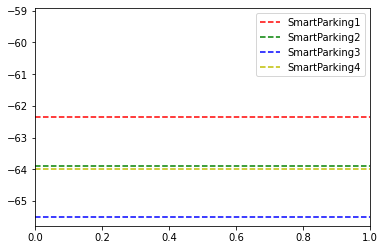

In [120]:
plot_data("parking.csv", True, False)

Then the sensors were lokated in such way:
So, the parking loooked like:
```
- (SP1)           - (SP2)           - (SP4)
            
                      
                                    
                                    PC
               
        - (SP3)
```

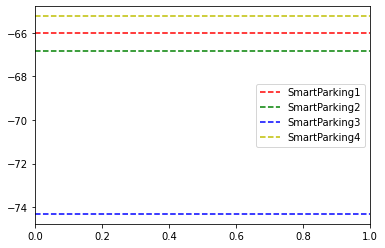

In [121]:
plot_data("parking_other_lot.csv", True, False)

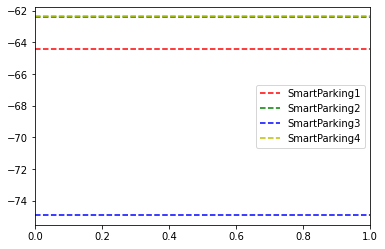

In [119]:
plot_data("parking_other_lot_closer_to_the_source.csv", True, False)